# Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd

In [2]:
DATA_DIR = "./data"

## Look at the submission file format

In [3]:
submission = pd.read_parquet(f'{DATA_DIR}/sample_submission.parquet')
submission

,event_id,azimuth,zenith
0,2092,1,1
1,7344,1,1
2,9482,1,1


# Check out the Meta files

In [39]:
train_meta_df = pd.read_parquet(f'{DATA_DIR}/train_meta.parquet')
train_meta_df.head(3)

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942


In [5]:
train_meta_df.isna().sum()

batch_id             0
event_id             0
first_pulse_index    0
last_pulse_index     0
azimuth              0
zenith               0
dtype: int64

In [6]:
len(train_meta_df)

131953924

In [7]:
test_meta_df = pd.read_parquet(f'{DATA_DIR}/test_meta.parquet', engine='fastparquet')
test_meta_df

,batch_id,event_id,first_pulse_index,last_pulse_index
0,661,2092,0,298
1,661,7344,299,334
2,661,9482,335,377


## Explore the first batch file of the dataset

In [8]:
batch_1_df = pd.read_parquet(f'{DATA_DIR}/train/batch_1.parquet')
batch_1_df.reset_index().head(3)

,event_id,sensor_id,time,charge,auxiliary
0,24,3918,5928,1.325,True
1,24,4157,6115,1.175,True
2,24,3520,6492,0.925,True
3,24,5041,6665,0.225,True
4,24,2948,8054,1.575,True
...,...,...,...,...,...
32792411,3266196,1961,17617,0.975,True
32792412,3266196,36,17705,0.625,True
32792413,3266196,356,18192,0.725,True
32792414,3266196,2826,18609,0.575,True


In [9]:
batch_1_df.describe()

,sensor_id,time,charge
count,3.279242e+07,3.279242e+07,3.279242e+07
mean,2.713045e+03,1.313048e+04,3.908981e+00
std,1.543416e+03,4.876797e+03,1.628897e+01
min,0.000000e+00,5.714000e+03,2.500000e-02
25%,1.366000e+03,1.056600e+04,7.750000e-01
50%,2.741000e+03,1.181500e+04,1.075000e+00
75%,4.096000e+03,1.391600e+04,1.775000e+00
max,5.159000e+03,7.778500e+04,2.762025e+03


In [10]:
batch_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32792416 entries, 24 to 3266196
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sensor_id  int16  
 1   time       int64  
 2   charge     float64
 3   auxiliary  bool   
dtypes: bool(1), float64(1), int16(1), int64(1)
memory usage: 844.4 MB


array([[<Axes: title={'center': 'sensor_id'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'charge'}>, <Axes: >]], dtype=object)

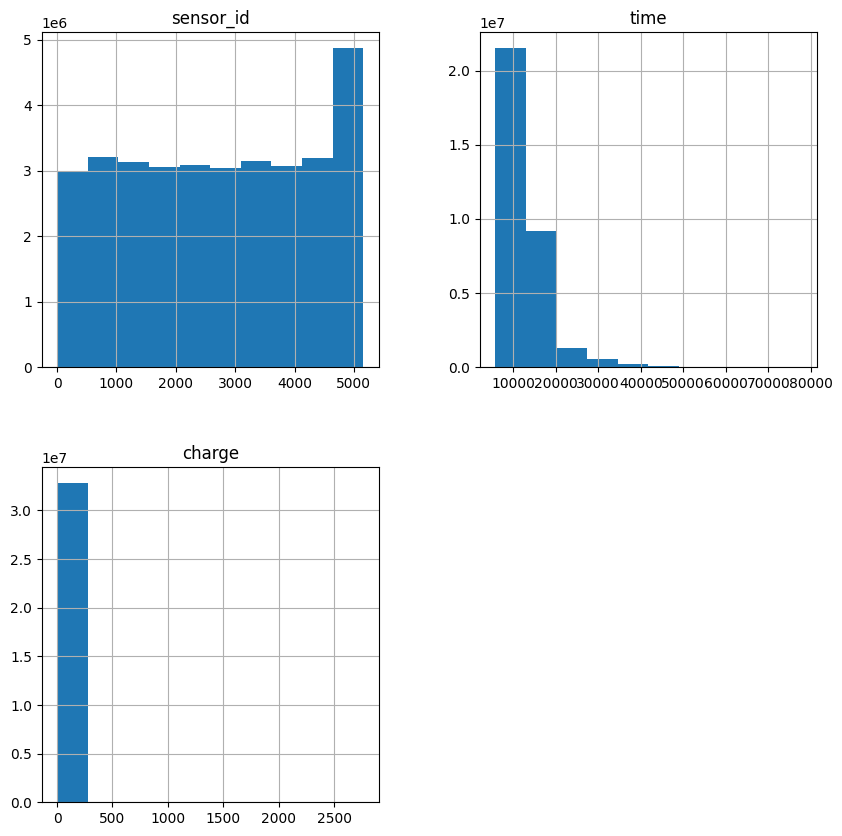

In [11]:
batch_1_df.hist(bins=10, figsize=(10, 10))

In [12]:
batch_1_df.reset_index().groupby('event_id')
batch_1_df

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
...,...,...,...,...
3266196,1961,17617,0.975,True
3266196,36,17705,0.625,True
3266196,356,18192,0.725,True


<Axes: >

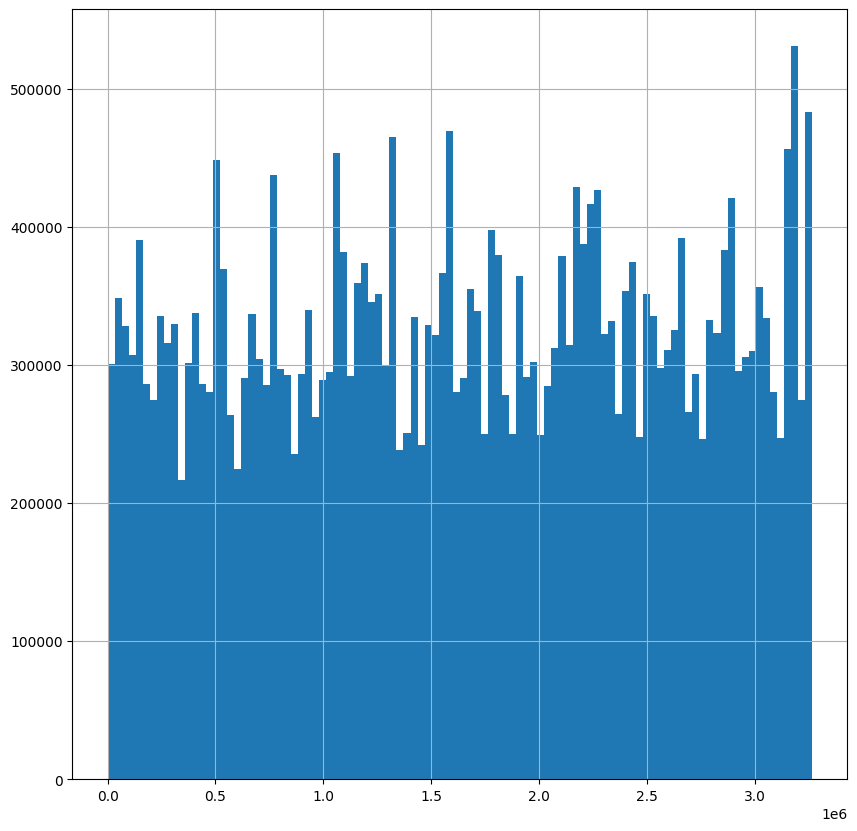

In [13]:
batch_1_df.reset_index()['event_id'].hist(bins=100, figsize=(10, 10))

### Plot time VS charge

<Axes: xlabel='time'>

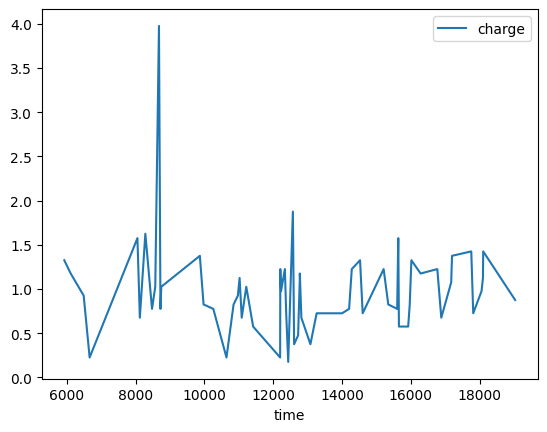

In [14]:
batch_1_df.loc[24].plot('time', 'charge') # type: ignore

### Add event relative time to the dataframe

In [15]:
def add_event_relative_time(gr: pd.DataFrame) -> pd.DataFrame:
    """Add relative time from the start of the event to each observation in

    Args:
        gr (pd.DataFrame): A singe dataframe representing the event

    Returns:
        pd.DataFrame: The new event with the relative time added
    """
    gr['rel_time'] = gr['time'] - gr['time'].min()
    return gr

## Explore sensors

In [16]:
sensor_geometry = pd.read_csv(f'{DATA_DIR}/sensor_geometry.csv', index_col=0)
print(f"Shape: {sensor_geometry.shape}")
sensor_geometry.head(10)

Shape: (5160, 3)


,x,y,z
sensor_id,,,
0,-256.14,-521.08,496.03
1,-256.14,-521.08,479.01
2,-256.14,-521.08,461.99
3,-256.14,-521.08,444.97
4,-256.14,-521.08,427.95
5,-256.14,-521.08,410.93
6,-256.14,-521.08,393.91
7,-256.14,-521.08,376.88
8,-256.14,-521.08,359.86


In [64]:
import plotly.express as px

fig = px.scatter_3d(sensor_geometry, x='x', y='y', z='z', color="z", opacity=0.5)
fig.update_traces(marker_size=3)
fig.show()

In [18]:

print(f'X axis: top {sensor_geometry["x"].max()} bottom {sensor_geometry["x"].min()} range {sensor_geometry["x"].max()-sensor_geometry["x"].min()}') 
print(f'Y axis: top {sensor_geometry["y"].max()} bottom {sensor_geometry["y"].min()} range {sensor_geometry["y"].max()-sensor_geometry["y"].min()}') 
print(f'Z axis: top {sensor_geometry["z"].max()} bottom {sensor_geometry["z"].min()} range {sensor_geometry["z"].max()-sensor_geometry["z"].min()}')

X axis: top 576.37 bottom -570.9 range 1147.27
Y axis: top 509.5 bottom -521.08 range 1030.58
Z axis: top 524.56 bottom -512.82 range 1037.38


## Plot a single event

In [19]:
batch_1_df = batch_1_df.reset_index()

In [20]:
batch_1_df[batch_1_df['auxiliary'] == False]

,event_id,sensor_id,time,charge,auxiliary
12,24,5059,9868,1.375,False
22,24,558,12201,0.225,False
23,24,557,12206,1.225,False
25,24,557,12227,0.975,False
26,24,558,12339,1.225,False
...,...,...,...,...,...
32792396,3266196,1133,13955,0.975,False
32792397,3266196,4771,14455,0.525,False
32792398,3266196,1736,14644,1.225,False
32792400,3266196,5006,14742,0.875,False


In [21]:
event_24_df = batch_1_df[batch_1_df['event_id'] == 24]
event_24_df

,event_id,sensor_id,time,charge,auxiliary
0,24,3918,5928,1.325,True
1,24,4157,6115,1.175,True
2,24,3520,6492,0.925,True
3,24,5041,6665,0.225,True
4,24,2948,8054,1.575,True
...,...,...,...,...,...
56,24,3452,17812,0.725,True
57,24,48,18053,0.975,True
58,24,3267,18095,1.125,True
59,24,3267,18102,1.425,True


In [22]:
event_24_df = pd.merge(
    left = event_24_df,
    right = sensor_geometry,
    how='inner',
    on='sensor_id'
)

event_24_df

,event_id,sensor_id,time,charge,auxiliary,x,y,z
0,24,3918,5928,1.325,True,303.41,335.64,206.58
1,24,4157,6115,1.175,True,-145.45,374.24,212.73
2,24,3520,6492,0.925,True,505.27,257.88,-174.60
3,24,3520,14523,1.325,True,505.27,257.88,-174.60
4,24,5041,6665,0.225,True,-9.68,-79.50,181.00
...,...,...,...,...,...,...,...,...
56,24,3452,17812,0.725,True,382.35,238.90,-46.12
57,24,48,18053,0.975,True,-256.14,-521.08,-320.97
58,24,3267,18095,1.125,True,11.87,179.19,42.78
59,24,3267,18102,1.425,True,11.87,179.19,42.78


### Plot event 24 

In [23]:
from sklearn.decomposition import PCA

X_train=event_24_df[['x', 'y', 'z']]

In [24]:
x=X_train['x']
y=X_train['y']
z=X_train['z']

In [25]:
coords = np.array((x,y,z)).T
coords

array([[ 303.41,  335.64,  206.58],
       [-145.45,  374.24,  212.73],
       [ 505.27,  257.88, -174.6 ],
       [ 505.27,  257.88, -174.6 ],
       [  -9.68,  -79.5 ,  181.  ],
       [ 576.37,  170.92,  357.88],
       [-290.66, -307.38,  163.61],
       [-526.63,  -15.6 , -178.17],
       [ 500.43,  -58.45,  450.79],
       [-313.6 ,  237.44,  348.01],
       [-313.6 ,  237.44,  348.01],
       [  -9.68,  -79.5 , -205.47],
       [  -9.68,  -79.5 , -205.47],
       [  -9.68,  -79.5 , -205.47],
       [ 576.37,  170.92, -135.72],
       [  -9.68,  -79.5 , -219.49],
       [ 505.27,  257.88,  233.9 ],
       [ 505.27,  257.88,  233.9 ],
       [-234.95,  140.44, -197.79],
       [ 576.37,  170.92,  170.65],
       [-245.65, -190.49,  212.13],
       [-324.39,  -93.43, -350.9 ],
       [-324.39,  -93.43, -350.9 ],
       [ 257.31,  211.66,   44.86],
       [ 124.97, -131.25,  102.18],
       [-324.39,  -93.43,  159.72],
       [ 443.44, -194.35, -181.18],
       [  35.54, -364.83,  1

In [26]:
pca = PCA(n_components=1)
pca.fit(coords) 
direction_vector = pca.components_ # type: ignore

direction_vector

array([[0.88924748, 0.16626122, 0.42614097]])

In [27]:
origin = np.mean(coords, axis=0)
origin

array([ 11.91196721, -29.31639344,  26.40901639])

In [28]:
euclidean_distance = np.linalg.norm(coords - origin, axis=1)
euclidean_distance

array([500.62546436, 471.5252489 , 605.21776378, 605.21776378,
       163.96029894, 684.52939821, 433.23581862, 576.25355864,
       647.76373365, 529.66423978, 529.66423978, 238.22780203,
       238.22780203, 238.22780203, 620.47828487, 251.89468767,
       607.40137076, 607.40137076, 374.19682377, 616.04622017,
       356.10024173, 509.48175782, 509.48175782, 344.42743138,
       170.04064479, 367.39813016, 506.50343938, 374.60631798,
       374.60631798, 382.40531449, 382.40531449, 382.40531449,
       382.40531449, 307.84801182, 633.68378289, 633.68378289,
       419.09802777, 363.86895813, 351.44339215, 366.56374275,
       327.84904655, 360.9156601 , 409.17206967, 249.38248702,
       339.06668358, 604.59814609, 398.18524183, 707.48848321,
       430.11483091, 486.45767908, 551.66476781, 612.67736965,
       553.05847509, 637.4313039 , 414.36155691, 439.5763675 ,
       463.06028556, 659.05650963, 209.14809818, 209.14809818,
       565.34389262])

In [29]:
extent = np.max(euclidean_distance)
extent

707.4884832068319

In [30]:
el_1 = origin - direction_vector * extent
el_1

array([[-617.22038344, -146.94429322, -275.08081168]])

In [31]:
el_2 = origin + direction_vector * extent

In [32]:
line = np.vstack((el_1, el_2))

## Make basic particle trace

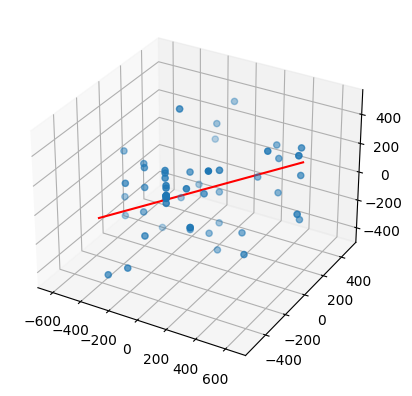

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords[:,0], coords[:,1], coords[:,2])
ax.plot(line[:,0], line[:,1], line[:,2], 'r')

## Make interactive chart with particle trace

In [63]:
import plotly.graph_objects as go

fig1 = px.scatter_3d(event_24_df, x='x', y='y', z='z', color="time", opacity=0.5)
fig1.update_traces(marker_size=3)
fig2 = px.line_3d(line[:,0], line[:,1], line[:,2])


fig3 = go.Figure(data = [
        go.Scatter3d(
            x=event_24_df['x'].to_numpy(), y=event_24_df['y'].to_numpy(), z=event_24_df['z'].to_numpy(),
            mode='markers',
            name="Detector readings",
            marker=dict(
                    size=event_24_df['charge'].to_numpy() * 10,
                    color=event_24_df['time'].to_numpy(), 
                    opacity=1,
                    showscale=True,
                    colorbar=dict(
                                title="Time",
                        ),
                ),
             text=[f"Color: <br>Size: " ],
             hovertemplate="""
             <b>X:</b> %{x}
             <br>
             <b>Y:</b> %{y}
             <br>
             <b>Z:</b> %{z}
             <br>
             <b>Time:</b> %{marker.color}
             <br>
             <b>Charge:</b> %{marker.size:.2f}
             """,
        ),
        go.Scatter3d(
            x=line[:,0], y=line[:,1], z=line[:,2],
            marker=dict(
                size=4,
                color='red',
            ),
            line=dict(
                color='red',
                width=3
            ),
            name="Predicted"
        )
    ],
      
    )
# Add a legend
fig3.update_layout(showlegend=True, legend=dict(x=0, y=1))

fig3.show()

# Look at the amount of charges per event

In [35]:
train_meta_df['charges'] = train_meta_df['last_pulse_index'] - train_meta_df['first_pulse_index']
train_meta_df

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith,charges
0,1,24,0,60,5.029555,2.087498,60
1,1,41,61,111,0.417742,1.549686,50
2,1,59,112,147,1.160466,2.401942,35
3,1,67,148,289,5.845952,0.759054,141
4,1,72,290,351,0.653719,0.939117,61
...,...,...,...,...,...,...,...
131953919,660,2147483597,24339210,24339349,5.895612,0.333071,139
131953920,660,2147483603,24339350,24339383,3.273695,1.503301,33
131953921,660,2147483617,24339384,24339424,2.945376,1.723253,40
131953922,660,2147483626,24339425,24339499,1.616582,1.937025,74


## We can capture most of information we need by taking the first 200 Charge pulses from each event 

<Axes: >

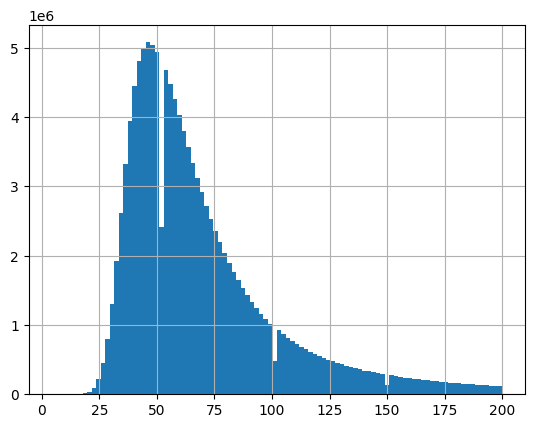

In [36]:
train_meta_df[train_meta_df['charges'] < train_meta_df['charges'].quantile(0.9428)]['charges'].hist(bins=100)

## Explore the optimal Data types for all features

In [41]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [42]:
print('Optimal Datatypes for meta data file features: ')
reduce_mem_usage(train_meta_df).info()

Optimal Datatypes for meta data file features: 
Memory usage after optimization is: 2894.34 MB
Decreased by 53.1%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131953924 entries, 0 to 131953923
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   batch_id           int16  
 1   event_id           Int64  
 2   first_pulse_index  int32  
 3   last_pulse_index   int32  
 4   azimuth            float16
 5   zenith             float16
dtypes: Int64(1), float16(2), int16(1), int32(2)
memory usage: 2.8 GB


In [43]:
print('Optimal datatypes for batch file features: ')
reduce_mem_usage(batch_1_df).info()

Optimal datatypes for batch file features: 
Memory usage after optimization is: 406.55 MB
Decreased by 51.9%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32792416 entries, 0 to 32792415
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int32  
 1   sensor_id  int16  
 2   time       int32  
 3   charge     float16
 4   auxiliary  bool   
dtypes: bool(1), float16(1), int16(1), int32(2)
memory usage: 406.6 MB


In [44]:
print('Optimal datatypes for sensor file features: ')
reduce_mem_usage(sensor_geometry).info()

Optimal datatypes for sensor file features: 
Memory usage after optimization is: 0.07 MB
Decreased by 56.2%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 0 to 5159
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5160 non-null   float16
 1   y       5160 non-null   float16
 2   z       5160 non-null   float16
dtypes: float16(3)
memory usage: 70.5 KB
